<a href="https://colab.research.google.com/github/shubham-k01/SDS_Exps/blob/main/STATS_EXP9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as stats
import math

In [ ]:
data=pd.read_csv('/content/PlantGrowth.csv')
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [ ]:
grps=pd.unique(data['group'])
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [ ]:
d_data={grp:data['weight'][data['group']==grp]for grp in grps}

In [ ]:
a=len(grps)
b=data.groupby('group').size()[0]

In [ ]:
print(a,b)

3 10


In [ ]:
b

10

In [ ]:
vb=(sum(data.groupby('group').sum()['weight']**2)/b)-(data['weight'].sum()**2/(a*b))
vb


3.766340000000014

In [ ]:
data.groupby('group').sum()['weight']

group
ctrl    50.32
trt1    46.61
trt2    55.26
Name: weight, dtype: float64

In [ ]:
ft=sum([value**2 for value in data['weight']])
v=(ft)-((data['weight'].sum()**2)/(a*b))
v

14.25843000000009

In [ ]:
vw=v-vb
vw

10.492090000000076

In [ ]:
MSB=vb/(a-1)
MSW=vw/(a*(b-1))
F=MSB/MSW


In [ ]:
F

4.846087862380118

In [ ]:
F_critical=stats.f.ppf(0.95,(a-1),(a*(b-1)))


In [ ]:
print(F_critical)

3.3541308285291986


In [ ]:
p=stats.f.sf(F,(a-1),(a*(b-1)))

In [ ]:
p

0.015909958325623124

In [ ]:
if p<0.05:
  print("Null hypothesis is rejected .Treatments are not equal")
else:
  print("Fail to reject Null hypothesis.Treatments are equal")

Null hypothesis is rejected .Treatments are not equal


In [ ]:
np.sqrt(MSW/b)

0.19712836577365744

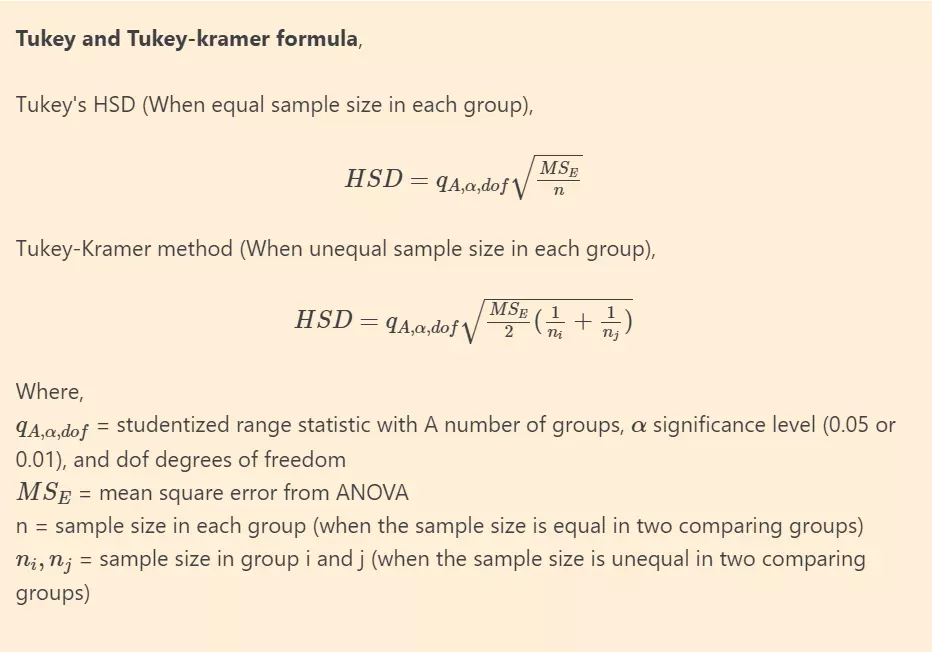

In [ ]:
HSD=0.7

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
m_comp=pairwise_tukeyhsd(endog=data['weight'],groups=data['group'],alpha=0.05)

In [ ]:
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


**So,trt1 and trt2 are significantly different**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
mod=ols('weight~ group',data=data).fit()

In [ ]:
aov_table=sm.stats.anova_lm(mod,type=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


**A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. After two months, she records the height of each plant, in inches. Perform a two-way ANOVA to determine if watering frequency and sunlight exposure have a significant effect on plant growth, and to determine if there is any interaction effect between watering frequency and sunlight exposure.**
* 5 plants were given low sun exposure and water daily
* 5 plants were given medium sun exposure and water daily
* 5 plants were given high sun exposure and water daily
* 5 plants were given low sun exposure and water weekly
* 5 plants were given medium sun exposure and water weekly
* 5 plants were given high sun exposure and water weekly
**Height of plant: 6, 6, 6, 5, 6, 5, 5, 6, 4, 5, 6, 6, 7, 8, 7, 3, 4, 4, 4, 5,  4, 4, 4, 4, 4, 5, 6, 6, 7, 8**

In [ ]:
df=pd.DataFrame({'water':np.repeat(['daily','weekly'],15)
                  ,'Sun':np.tile(np.repeat(['low','medium','high'],5),2)
                  ,'height':[6, 6, 6, 5, 6, 5, 5, 6, 4, 5, 6, 6, 7, 8, 7, 3, 4, 4, 4, 5,  4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [ ]:
df

,water,Sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,medium,5
6,daily,medium,5
7,daily,medium,6
8,daily,medium,4
9,daily,medium,5


In [ ]:
mod=ols('height~C(water)+C(Sun)+C(water):C(Sun)',data=df).fit()

In [ ]:
aov_table=sm.stats.anova_lm(mod,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(Sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water):C(Sun),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


* Water frequency has an effect on plant growth .Test is significant
* Strength of sun exposure has an effect . Test is significant.
* Interaction effect is not significant. 
Impact of water frequency is not affected by sun exposure.